In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('energydata_complete.csv')
#df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [5]:
#to make the dataset more readable, lets rename the columns
column_names = {'T1':'Temp_kitchen', 'RH_1': 'Humidity_kitchen', 
                'T2':  'Temp_living_room', 'RH2': 'Humidity_living_room', 'T3': 'Temp_laundry',
                'RH_3': 'Humidity_Laundry', 'T4': 'Temp_Office', 'RH_4': 'Humidity_Office', 'T5': 'Temp_Bathroom',
                'RH_5': 'Humidity_Bathroom', 'T6': 'Temp_Out_North', 'RH_6': 'Humidity_Out_North', 'T7': 'Temp_Iron_room',
                'RH_8': 'Humidity_Iron_Room', 'T9': 'Temp_Parents', 'RH_9': 'Humidity_Parents', 'T_out': 'Temp_Chevres_station',
                'Press_mm_hg': 'Pressure', 'RH_out': 'Humidity_Chevres', 'Windspeed': 'Windspeed', 'Visibility': 'Visibility', 'Tdewpoint': 'Tdewpoint',
                'rv1': 'random_var1', 'rv2': 'random_var2'}

In [67]:
df = df.rename(columns = column_names)


In [7]:
simple_linear_reg_df = df[['Temp_kitchen', 'Appliances']].sample(15, random_state=2)

C:\Users\AIDEE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


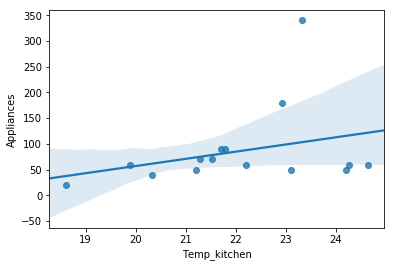

In [8]:
sns.regplot(x="Temp_kitchen", y="Appliances", data=simple_linear_reg_df)

# MEASURING REGRESSION PERFORMANCE

MEAN ABSOLUTE ERROR

In [9]:
#first we need to normalize

In [68]:
#dropping date and light collumns
df_clean = df.drop(columns = ['date', 'lights'])

In [11]:
from sklearn.preprocessing import MinMaxScaler
norm_df_clean = pd.DataFrame(MinMaxScaler().fit_transform(df_clean), columns = df_clean.columns)

C:\Users\AIDEE\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
features_df = norm_df_clean.drop(columns = ['Appliances'])
target = norm_df_clean['Appliances']

In [13]:
#Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size = 0.3, random_state = 42)

# Question 12

In [46]:
x1 = np.array(df_clean['Temp_living_room'])
y1 = np.array(df_clean['Temp_Out_North'])
x1 = x1.reshape(-1,1)
x1

array([[19.2       ],
       [19.2       ],
       [19.2       ],
       ...,
       [25.62857143],
       [25.414     ],
       [25.26428571]])

In [47]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [64]:
from sklearn.linear_model import LinearRegression
linear_model2 = LinearRegression()
linear_model2.fit(x1_train, y1_train)
lin_model2 = linear_model2.predict(x1_test)

In [65]:
#Qst 12, R2 = 0.64
r2_lin_model2 = r2_score(y1_test, lin_model2)
round(r2_lin_model2, 2)

0.64

In [49]:
#modelling the dataset using Linear Regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
#to obtain predictions
predicted_values = linear_model.predict(x_test)

# Question 13

In [51]:
#to get the MAE
from sklearn.metrics import mean_absolute_error
Mean_error = mean_absolute_error(predicted_values, y_test )
#Mean_error
#you can as well round it up, using code below;
round(Mean_error, 2)

0.05

R-SQUARED

# Question 14

In [52]:
residual_ss = np.sum(np.square(y_test - predicted_values))
round(residual_ss, 2)

45.35

# Question 15

In [53]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, predicted_values))
round(RMSE, 3)

0.088

# Question 16

In [54]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predicted_values)
round(r2, 2)

0.15

# Question 17

In [55]:
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [66]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,Temp_Chevres_station,-0.321860
2,Temp_living_room,-0.236178
3,Temp_Parents,-0.189941
4,Humidity_Iron_Room,-0.157595
5,Humidity_Chevres,-0.077671
6,RH_7,-0.044614
7,Humidity_Parents,-0.039800
8,Temp_Bathroom,-0.015657
9,Temp_kitchen,-0.003281


# RIDGE REGRESSION

In [20]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
ridge_pred = ridge_reg.predict(x_test)

# Question 18

In [57]:
rmse_Ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))
round(rmse_Ridge, 3)

0.088

In [23]:
r2_Ridge = r2_score(y_test, ridge_pred)
round(r2_Ridge, 3)

0.148

# LASSO REGRESSION

In [24]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
r2_Lasso = r2_score(y_test, lasso_pred)
round(r2_Lasso, 3)

0.027

# Question 19

In [58]:
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
np.sum(lasso_weights_df != 0)

Features        26
Lasso_weight     4
dtype: int64

# Question 20

In [59]:
lasso_pred =lasso_reg.predict(x_test)
rmse_Lasso = np.sqrt(mean_squared_error(y_test, lasso_pred))
round(rmse_Lasso, 3)

0.094